In [1]:
include((x->x[1:find(t->t=='/', x)[end]])(pwd())*"src/MDBM.jl")
using MDBM
using Plots
plotly()
# plotlyjs()

In [4]:
struct MemoizationFunction{T}
    f::Function
    containter:: Vector{T}
end


In [12]:
f=x->x^2;
typeof(f(1.1))


Float64

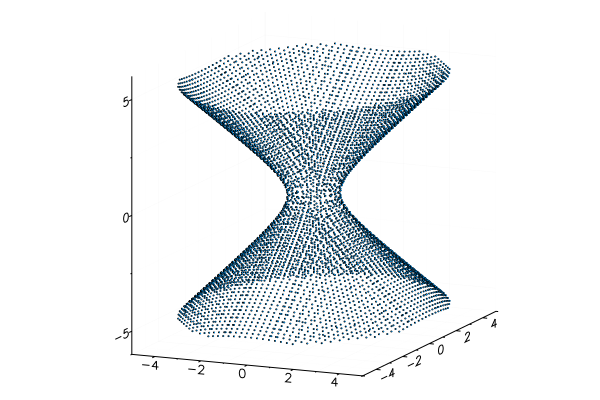

In [2]:
# -----3 parameter , 1 implicit equation ---------------
f1(x,y,z) = [x*x+y*y-z*z-1]
ax=[collect(-5.0:5.0),collect(-5.0:5.0),-5:5]

mdbm_solutionSurf=mdbm_problem(f1,ax,fullrefinenum=2)# run all the steps automatcally

scatter(mdbm_solutionSurf.posinterp[1,:],mdbm_solutionSurf.posinterp[2,:],mdbm_solutionSurf.posinterp[3,:], leg=false, xlim=(-5,5), ylim=(-5,5), zlim=(-5,5), markersize=1)

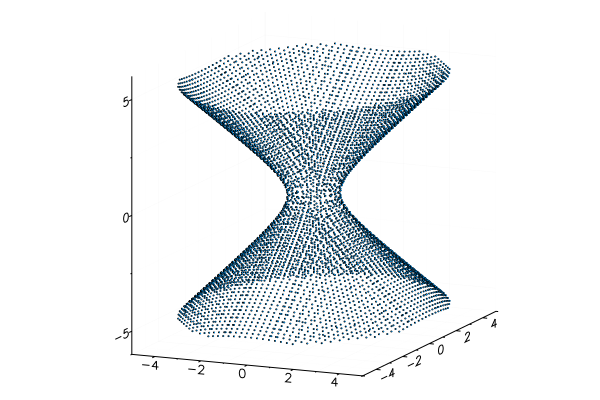

In [3]:
# -----3 parameter , 1 implicit equation ---------------
mdbm_solutionSurf=mdbm_problem(f1,ax) # initialization only

# run the steps separately
for k in 1:2
    refine!(mdbm_solutionSurf)
    checkncube!(mdbm_solutionSurf)
end
checkneighbour!(mdbm_solutionSurf)
interpolate!(mdbm_solutionSurf) # interpolation at the end

scatter(mdbm_solutionSurf.posinterp[1,:],mdbm_solutionSurf.posinterp[2,:],mdbm_solutionSurf.posinterp[3,:], leg=false, xlim=(-5,5), ylim=(-5,5), zlim=(-5,5), markersize=1)


  0.168558 seconds (406.98 k allocations: 33.346 MiB, 4.93% gc time)


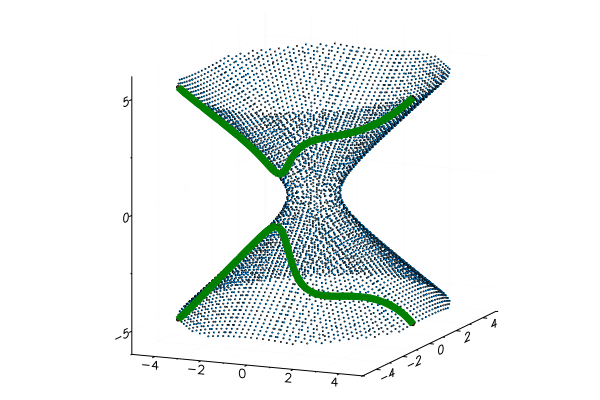

In [4]:
# -----3 parameter , 2 implicit equations ---------------
f2(x,y,z) = [x*x+y*y-z*z-1,y+sin(x)+2]
ax=[collect(-5.0:5.0),collect(-5.0:5.0),-5:5]

@time mdbm_solutionLine=mdbm_problem(f2,ax,fullrefinenum=2)

scatter!(mdbm_solutionLine.posinterp[1,:],mdbm_solutionLine.posinterp[2,:],mdbm_solutionLine.posinterp[3,:], color="red", leg=false, xlim=(-5,5), ylim=(-5,5), zlim=(-5,5), markersize=2)

@time DTconnect!(mdbm_solutionLine)# connection for plotting (not needed in case of scatter)
plot!(mdbm_solutionLine.posinterp[1,mdbm_solutionLine.DT1'],mdbm_solutionLine.posinterp[2,mdbm_solutionLine.DT1'],mdbm_solutionLine.posinterp[3,mdbm_solutionLine.DT1'], color="green",linewidth=7,leg=false, xlim=(-5,5), ylim=(-5,5), zlim=(-5,5))


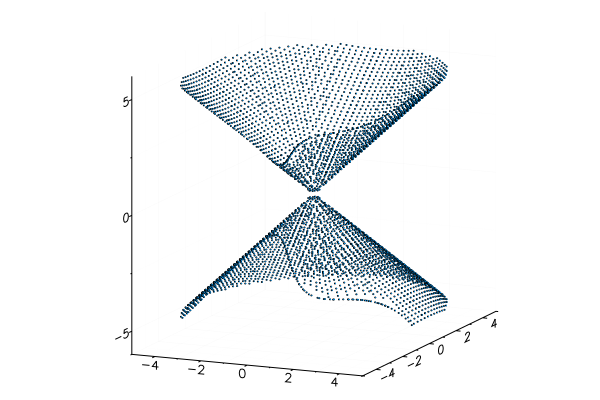

  3.468456 seconds (1.89 M allocations: 98.409 MiB, 1.44% gc time)


In [5]:
# -----3 parameter , 1 implicit equation, 1 implicit equation for constrain ---------------
f1(x,y,z) = [x*x+y*y-z*z]
fc(x,y,z) = y+sin(x)+2
 
mdbm_solutionConstrainedSurface=mdbm_problem(f1,ax,fullrefinenum=2,fconstrain=fc)
scatter(mdbm_solutionConstrainedSurface.posinterp[1,:],mdbm_solutionConstrainedSurface.posinterp[2,:],mdbm_solutionConstrainedSurface.posinterp[3,:], leg=false, xlim=(-5,5), ylim=(-5,5), zlim=(-5,5), markersize=1)
